In [113]:
import numpy as np
import pandas as pd
from functools import reduce

## Tweets

In [3]:
xrp = pd.read_csv("raw_data/XRP_stocktwits.csv").iloc[:, :2]
min(xrp.timestamp), max(xrp.timestamp)
# Need to filter > 2022 in other datasets

('2022-01-07T00:01:14.005660+00:00', '2022-02-28T23:52:34.006678')

In [4]:
xrp.to_csv("data/xrp_tweets.csv", index = False)

### cryptodatadownload data

In [122]:
def clean_binance_data(filename):
    df = pd.read_csv(filename, skiprows = 1)
    print("Shape before:", df.shape)
    df = df.drop(['unix', 'symbol'], axis = 1)
    df = df[df.date > "2022-01-01"]
    df["date"] = pd.to_datetime(df.date)
    df = df.sort_values("date")
    print("Shape after:", df.shape)
    return df

#### XRP

In [138]:
day_xrp = clean_binance_data('raw_data/Binance_XRPUSDT_d.csv')
day_xrp.to_csv("data/XRPUSDT_day.csv", index = False)

Shape before: (1398, 10)
Shape after: (60, 8)


In [139]:
hour_xrp = clean_binance_data('raw_data/Binance_XRPUSDT_1h.csv')
hour_xrp.to_csv("data/XRPUSDT_hour.csv", index = False)

Shape before: (13808, 10)
Shape after: (1417, 8)


In [140]:
minute_xrp = clean_binance_data('raw_data/Binance_XRPUSDT_minute.csv')
minute_xrp.to_csv("data/XRPUSDT_minute.csv", index = False)

Shape before: (1124679, 10)
Shape after: (85148, 8)


#### BTC

In [141]:
day_btc = clean_binance_data('raw_data/Binance_BTCUSDT_d.csv')
day_btc.to_csv("data/BTCUSDT_day.csv", index = False)

Shape before: (1662, 10)
Shape after: (63, 8)


In [142]:
hour_btc = clean_binance_data('raw_data/Binance_BTCUSDT_1h.csv')
hour_btc.to_csv("data/BTCUSDT_hour.csv", index = False)

Shape before: (42464, 10)
Shape after: (1489, 8)


In [143]:
minute_xrp = clean_binance_data('raw_data/Binance_BTCUSDT_minute.csv')
minute_xrp.to_csv("data/BTCUSDT_minute.csv", index = False)

Shape before: (1301250, 10)
Shape after: (89496, 8)


### NASDAQ

In [186]:
def clean_nasdaq_yh_data(filename):
    df = pd.read_csv(filename)
    print("Shape before: ", df.shape)
    df["Date"] = pd.to_datetime(df.Date)
    df = df[df["Date"] > "2022-01-01"]
    df = df.sort_values("Date")
    print("Shape after: ", df.shape)
    return df

#### Gold

In [187]:
gold = clean_nasdaq_data('raw_data/GOLDUSD.csv')
gold.to_csv("data/GOLDUSD_day.csv", index = False)

Shape before:  (125, 6)
Shape after:  (42, 6)


#### SNP500

In [188]:
snp = clean_nasdaq_data('raw_data/SNP500USD.csv')
snp.to_csv("data/SNP500USD_day.csv", index = False)

Shape before:  (125, 6)
Shape after:  (42, 6)


#### VIX 

In [189]:
vix = clean_nasdaq_yh_data('raw_data/VIXUSD.csv')
vix.to_csv('data/VIXUSD_day.csv', index = False)

Shape before:  (254, 7)
Shape after:  (43, 7)


### Joined prices

In [193]:
day_xrp["price"] = (day_xrp.open + day_xrp.high + day_xrp.low + day_xrp.close ) / 4
day_btc["price"] = (day_btc.open + day_btc.high + day_btc.low + day_btc.close ) / 4
gold["price"] = (gold.Open + gold.High + gold.Low + gold["Close/Last"]) / 4
snp["price"] = (snp.Open + snp.High + snp.Low + snp["Close/Last"]) / 4
vix["price"] = (vix.Open + vix.High + vix.Low + vix["Close"]) / 4

In [204]:
xrpjoin = day_xrp[['date', 'price', 'Volume USDT', 'tradecount']].rename({'date':'Date', 'price':'xrp', 'Volume USDT': 'XRP_volume_usdt'}, axis = 1)
btcjoin = day_btc[['date', 'price']].rename({'date':'Date', 'price':'btc'}, axis = 1)
goldjoin = gold[['Date', 'price']].rename({ 'price':'gold'}, axis = 1)
snpjoin = snp[['Date', 'price']].rename({'price':'snp'}, axis = 1)
vixjoin = vix[['Date', 'price']].rename({ 'price':'vix'}, axis = 1)

In [217]:
dfs_to_join = [xrpjoin, btcjoin, goldjoin, snpjoin, vixjoin]
df = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs_to_join)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             40 non-null     datetime64[ns]
 1   xrp              40 non-null     float64       
 2   XRP_volume_usdt  40 non-null     float64       
 3   tradecount       40 non-null     int64         
 4   btc              40 non-null     float64       
 5   gold             40 non-null     float64       
 6   snp              40 non-null     float64       
 7   vix              40 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 2.8 KB


In [218]:
df.to_csv("data/all_prices.csv", index = False)

In [213]:
df = df.iloc[:, 1:]

<AxesSubplot:>

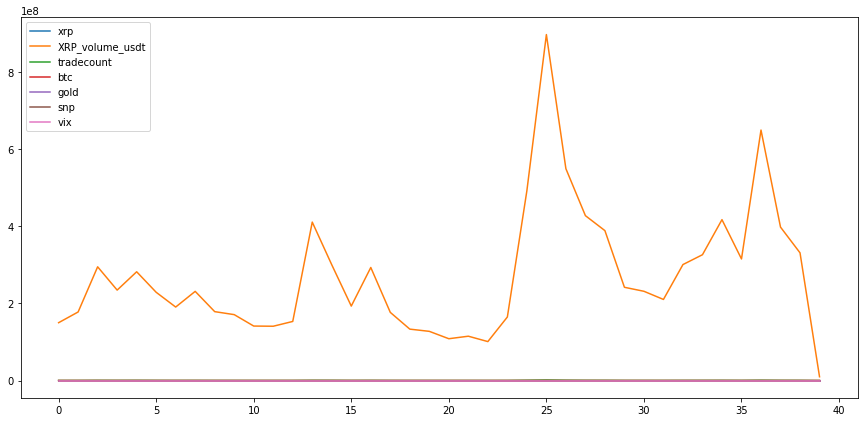

In [214]:
df.plot(figsize = (15, 7))

In [215]:
standartizeddf=(df-df.mean())/df.std(ddof = 1)

<AxesSubplot:>

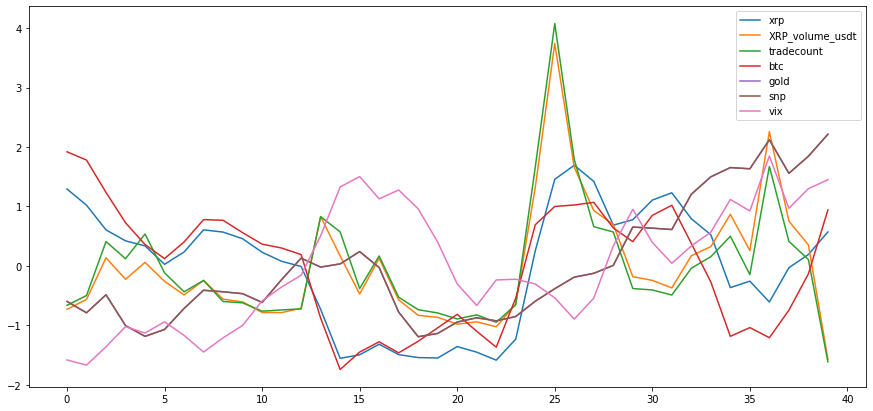

In [216]:
standartizeddf.plot(figsize = (15, 7))